In [1]:
%matplotlib inline 
import matplotlib.pyplot as plt 
import numpy as np
from scipy.optimize import curve_fit
from scipy.optimize import broyden1
from scipy.stats import linregress

In [13]:
U_aus=np.array([2.472,2.740,3.010,3.579])
U_aus_Fehler=np.array([0.01,0.01,0.011,0.014])
T=np.array([50.22,100.83,150.87,249.87])+273.15
Widerstand=np.array([4779.3,5553,6306,7762.1])
U_V=1.362
Fehler_U_V=0.005
F=(U_aus**2-U_V**2)/Widerstand
Fehler_F=1/Widerstand*(np.sqrt((2*U_aus*U_aus_Fehler)**2-(U_V*2*Fehler_U_V)**2))

<ErrorbarContainer object of 3 artists>

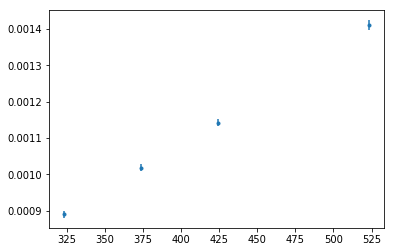

In [14]:
plt.errorbar(T,F,yerr=Fehler_F,fmt='.')

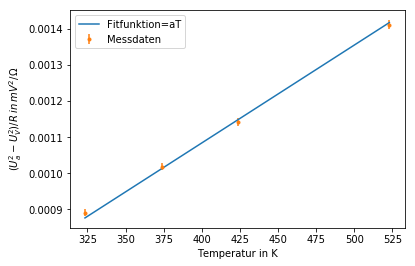

In [15]:
def linear(x,c):
    return(c*x)
popt, pcov = curve_fit(linear,T,F)
plt.plot (T,linear(T,popt[0]),label='Fitfunktion=aT')
plt.errorbar(T,F,yerr=Fehler_F, fmt='.',label='Messdaten')
plt.xlabel('Temperatur in K')
plt.ylabel('$(U_a^2-U_V^2)/R \: in \:  mV^2/\Omega $')
plt.legend(loc='best')
plt.show()


In [16]:
chisquare=np.sum(((linear(T,*popt)-F)**2/Fehler_F**2))
dof=5 #Freiheitsgrade
chisquare_red=chisquare/dof
print('Chi^2='+str(chisquare))
print('Chi^2_R='+str(chisquare_red))
from scipy.stats import chi2 
prob=round(1-chi2.cdf(chisquare,dof),2)*100
print("Wahrscheinlichkeit="+str(prob)+"%")#
print("k:",popt[0]/4/4.85e10/1e6)
print("dk stat",np.sqrt(pcov[0,0])/4/4.85e10/1e6)
print("dk sys", popt[0]/4/4.85e10/1e6*0.02)

Chi^2=2.8531411102902857
Chi^2_R=0.5706282220580572
Wahrscheinlichkeit=72.0%
k: 1.3970910232470387e-23
dk stat 6.163569766490142e-26
dk sys 2.7941820464940775e-25


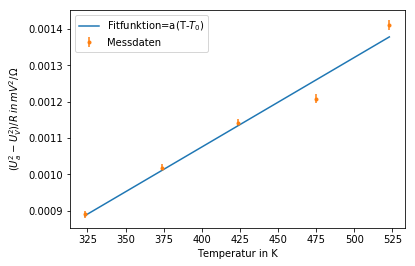

In [6]:
def linear_parttwo(y,d,h):
    return(d*(y-h)) 
p0=[0.00000067068,0]
z, cov = np.polyfit(T,F,1, cov=True)
plt.plot (T,T*z[0]+z[1],label='Fitfunktion=a(T-$T_0$)')
plt.errorbar(T,F,yerr=Fehler_F, fmt='.',label='Messdaten')
plt.xlabel('Temperatur in K')
plt.ylabel('$(U_a^2-U_V^2)/R \: in \:  mV^2/\Omega $')
plt.legend(loc='best')


In [7]:

print("F(0): ", z[1],"+-", np.sqrt(cov[1][1]))
print()

F(0):  9.112541029373203e-05 +- 0.00016777569096059896
